In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy
from scipy.signal import find_peaks, peak_widths

data=np.zeros((6,0,4))
largeslitsep=[0.301,0.7535,1.206,1.809,2.412,3.015]
data=pd.read_csv("Desktop/SFRT-Topas/div_opt/results/dosetomedium_grid_divopt_1.809__1.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
for i in np.arange(2,11):
    data1=pd.read_csv("Desktop/SFRT-Topas/div_opt/results/dosetomedium_grid_divopt_1.809__"+str(i)+".csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
    data.dose+= data1.dose

col='grid'
energy='10 MV'
hist="full phsp (parallel)"
CSD=1.0
x=np.arange(-2.49,2.49+0.02,0.02)

dose1=np.zeros((250,250))
dose2=np.zeros((250,250))
dose3=np.zeros((250,250))
for i in np.arange(0,len(data.dose),20):
    dose1[data.x[i]][data.y[i]]=data.dose[i]
    dose2[data.x[i+1]][data.y[i+1]]=data.dose[i+1]
    dose3[data.x[i+2]][data.y[i+2]]=data.dose[i+2]

(array([ 0.51265222,  9.40343277,  1.46561858,  1.38134988,  1.1361222 ,
        7.66799554,  8.32350785, 18.20123569,  0.99054451,  7.27310041,
        1.2377034 ,  4.16977151,  1.68406717,  1.99536675]), array([1.64627368e-08, 1.72825703e-08, 1.98785687e-08, 2.34795710e-08,
       3.10307549e-08, 6.90923233e-08, 8.35453032e-08, 6.54269805e-08,
       9.83114967e-08, 6.97426924e-08, 3.13979046e-08, 2.31001695e-08,
       1.81510169e-08, 2.00853433e-08]), array([  0.98734778,   8.68802177,  39.03438142,  57.11865012,
        72.3638778 ,  86.92484526, 103.54042339, 116.53371115,
       141.5       , 154.86169826, 173.86125015, 190.54736286,
       209.88770865, 235.17035461]), array([  1.5       ,  18.09145454,  40.5       ,  58.5       ,
        73.5       ,  94.5928408 , 111.86393124, 134.73494683,
       142.49054451, 162.13479866, 175.09895355, 194.71713437,
       211.57177582, 237.16572136]))


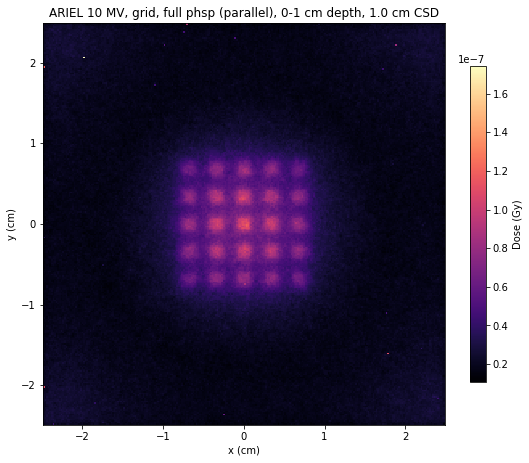

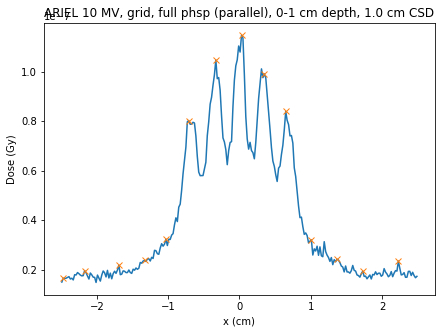

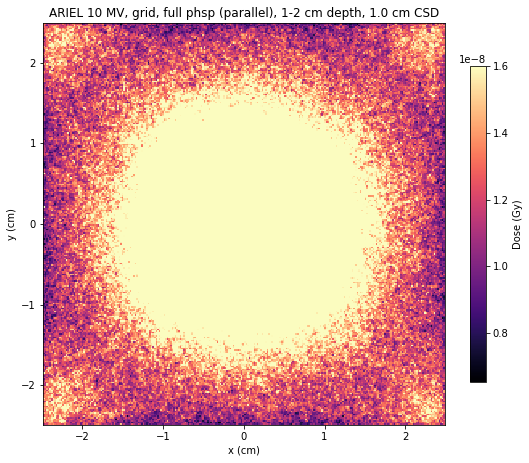

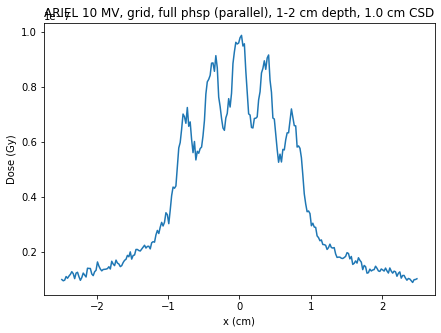

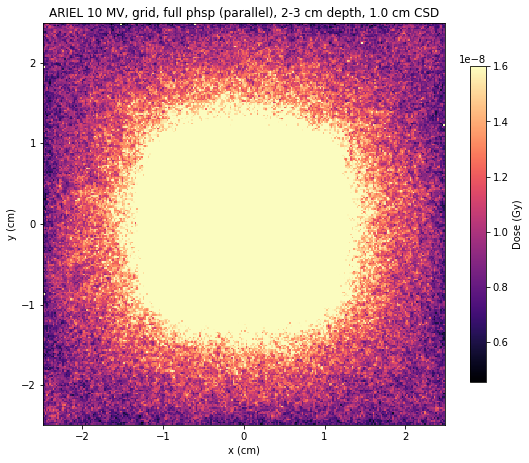

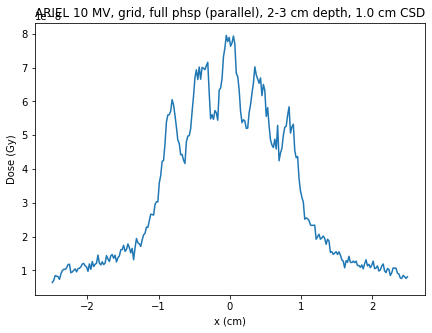

In [47]:
ybins=2 #should be even

figure(4,figsize=(9,8))
plt.title('ARIEL '+str(energy)+', '+col+', '+str(hist)+', 0-1 cm depth, '+str(CSD)+' cm CSD')
plt.imshow(dose1.T,cmap='magma',extent=(-2.49,2.49,-2.49,2.49))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose (Gy)')

profile1=(dose1.T[125]+dose1.T[124])/2
peaks=find_peaks(profile1,height=0.5e-8,distance=15)[0]
peakwidths=peak_widths(profile1, peaks, rel_height=0.5)
print(peakwidths)
figure(5,figsize=(7,5))
plt.title('ARIEL '+str(energy)+', '+col+', '+str(hist)+', 0-1 cm depth, '+str(CSD)+' cm CSD')
plt.plot(x,(dose1.T[125]+dose1.T[124])/2)
plt.plot(x[peaks],profile1[peaks],'x')
#plt.hlines(peakwidths[1],(peakwidths[2]-250)/100,(peakwidths[3]-250)/100,color="C2")
plt.xlabel('x (cm)')
plt.ylabel('Dose (Gy)')

figure(6,figsize=(9,8))
plt.title('ARIEL '+str(energy)+', '+col+', '+str(hist)+', 1-2 cm depth, '+str(CSD)+' cm CSD')
plt.imshow(dose2.T,cmap='magma',vmax=1.6e-8,extent=(-2.49,2.49,-2.49,2.49))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose (Gy)')

figure(7,figsize=(7,5))
plt.title('ARIEL '+str(energy)+', '+col+', '+str(hist)+', 1-2 cm depth, '+str(CSD)+' cm CSD')
plt.plot(x,(dose2.T[125]+dose2.T[124])/2)
plt.xlabel('x (cm)')
plt.ylabel('Dose (Gy)')

figure(8,figsize=(9,8))
plt.title('ARIEL '+str(energy)+', '+col+', '+str(hist)+', 2-3 cm depth, '+str(CSD)+' cm CSD')
plt.imshow(dose3.T,cmap='magma',vmax=1.6e-8,extent=(-2.49,2.49,-2.49,2.49))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose (Gy)')

figure(9,figsize=(7,5))
plt.title('ARIEL '+str(energy)+', '+col+', '+str(hist)+', 2-3 cm depth, '+str(CSD)+' cm CSD')
plt.plot(x,(dose3.T[125]+dose3.T[124])/2)
plt.xlabel('x (cm)')
plt.ylabel('Dose (Gy)')

df = pd.DataFrame(data={"x": x, "Dose": profile1})
df.to_csv("Desktop/profileforNolan.csv", sep=',',index=False)

In [ ]:
x=np.arange(0,250)
xdose=[]
xdose0cm=[]

xbins=250
xwidth=0.02
ybins=250
ywidth=0.02
zbins=20
zwidth=1

yrange=0.02*1 #need odd number
#print(x,np.arange(0,len(data.x),4999))
for i in np.arange(0,len(data.x),xbins*zbins):
    for k in np.arange(ybins*zbins/2-(yrange/2/ywidth)*zbins+10,ybins*zbins/2+(yrange/2/ywidth)*zbins+10,20):
        xdose.append(data.dose[int(i+k)])
    xdose0cm.append(np.mean(xdose))
    xdose=[]
xdose0cm3=np.array(xdose0cm)

xdose3cm=[]
xdose=[]
for i in np.arange(0,len(data.x),xbins*zbins):
    for k in np.arange(ybins*zbins/2-(yrange/2/ywidth)*zbins+10,ybins*zbins/2+(yrange/2/ywidth)*zbins+10,20):
        xdose.append(data.dose[int(i+k+3)])
    xdose3cm.append(np.mean(xdose))
    xdose=[]
xdose3cm=np.array(xdose3cm)

xdose6cm=[]
xdose=[]
for i in np.arange(0,len(data.x),5000):
    for k in np.arange(ybins*zbins/2-(yrange/2/ywidth)*zbins+10,ybins*zbins/2+(yrange/2/ywidth)*zbins+10,20):
        xdose.append(data.dose[int(i+k+6)])
    xdose6cm.append(np.mean(xdose))
    xdose=[]
xdose6cm=np.array(xdose6cm)

figure(8,figsize=(7,5))
plt.plot(x,xdose0cm1,label='lightning')
plt.plot(x,xdose0cm2,label='mid')
plt.plot(x,xdose0cm3,label='hobbler')
plt.title('Dose (Gy),'+str(energy)+' ARIEL, '+col+', '+str(hist)+'M, 0-1 cm, '+str(CSD)+' cm CSD')
plt.legend()

figure(1,figsize=(7,5))
plt.plot(x,xdose0cm)
plt.title('Dose (Gy), x profile,'+str(energy)+' ARIEL, '+col+', '+str(hist)+'k, 0-1 cm, '+str(CSD)+' cm CSD')

figure(2,figsize=(7,5))
plt.plot(x,xdose3cm)
plt.title('Dose (Gy), x profile, '+str(energy)+' ARIEL, '+col+', '+str(hist)+'k, 3-4 cm, '+str(CSD)+' cm CSD')


figure(3,figsize=(7,5))
plt.plot(x,xdose6cm)
plt.title('Dose (Gy), x profile, '+str(energy)+' ARIEL, '+col+', '+str(hist)+'k, 6-7 cm, '+str(CSD)+' cm CSD')
